In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('customer_segment.csv')
df.head(4)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6


In [4]:
df['Category'].unique()

array(['Cat_6', 'Cat_4', 'Cat_3', nan, 'Cat_1', 'Cat_2', 'Cat_5', 'Cat_7'],
      dtype=object)

In [7]:
df=df.drop(('ID'),axis = 1)

In [8]:
df.head(2)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6


In [9]:
df.tail(2)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4
2626,Female,No,43,Yes,Healthcare,9.0,Low,3.0,Cat_7


# EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2627 non-null   object 
 1   Ever_Married     2577 non-null   object 
 2   Age              2627 non-null   int64  
 3   Graduated        2603 non-null   object 
 4   Profession       2589 non-null   object 
 5   Work_Experience  2358 non-null   float64
 6   Spending_Score   2627 non-null   object 
 7   Family_Size      2514 non-null   float64
 8   Category         2595 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 184.8+ KB


In [11]:
df.describe()

,Age,Work_Experience,Family_Size
count,2627.000000,2358.000000,2514.000000
mean,43.649791,2.552587,2.825378
std,16.967015,3.341094,1.551906
min,18.000000,0.000000,1.000000
25%,30.000000,0.000000,2.000000
50%,41.000000,1.000000,2.000000
75%,53.000000,4.000000,4.000000
max,89.000000,14.000000,9.000000


In [12]:
df.columns

Index(['Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Category'],
      dtype='object')

Label Encoding:

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Ever_Married'] = le.fit_transform(df['Ever_Married'])
df['Graduated'] = le.fit_transform(df['Graduated'])
df['Profession'] = le.fit_transform(df['Profession'])
df['Spending_Score'] = le.fit_transform(df['Spending_Score'])
df['Category'] = le.fit_transform(df['Category'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           2627 non-null   int64  
 1   Ever_Married     2627 non-null   int32  
 2   Age              2627 non-null   int64  
 3   Graduated        2627 non-null   int32  
 4   Profession       2627 non-null   int32  
 5   Work_Experience  2358 non-null   float64
 6   Spending_Score   2627 non-null   int32  
 7   Family_Size      2514 non-null   float64
 8   Category         2627 non-null   int32  
dtypes: float64(2), int32(5), int64(2)
memory usage: 133.5 KB


In [16]:
df.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category
count,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2358.000000,2627.000000,2514.000000,2627.000000
mean,0.542063,0.616673,43.649791,0.628093,2.923487,2.552587,1.377236,2.825378,4.160259
std,0.498322,0.523983,16.967015,0.501956,2.666513,3.341094,0.843225,1.551906,1.437122
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
50%,1.000000,1.000000,41.000000,1.000000,3.000000,1.000000,2.000000,2.000000,5.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,2.000000,4.000000,5.000000
max,1.000000,2.000000,89.000000,2.000000,9.000000,14.000000,2.000000,9.000000,7.000000


In [17]:
#Checking missing value
df.isna().sum()

Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience    269
Spending_Score       0
Family_Size        113
Category             0
dtype: int64

In [18]:
# Filling in Missing vaule with bfill method
df = df.fillna(method = 'bfill')
df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Category           0
dtype: int64

In [19]:
df.describe()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category
count,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000
mean,0.542063,0.616673,43.649791,0.628093,2.923487,2.580891,1.377236,2.824134,4.160259
std,0.498322,0.523983,16.967015,0.501956,2.666513,3.367419,0.843225,1.557082,1.437122
min,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000
50%,1.000000,1.000000,41.000000,1.000000,3.000000,1.000000,2.000000,2.000000,5.000000
75%,1.000000,1.000000,53.000000,1.000000,5.000000,4.000000,2.000000,4.000000,5.000000
max,1.000000,2.000000,89.000000,2.000000,9.000000,14.000000,2.000000,9.000000,7.000000


In [20]:
# Checking for Null Value
df.isnull().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Category           0
dtype: int64

In [21]:
df['Category'].unique()

array([5, 3, 2, 7, 0, 1, 4, 6])

<Axes: xlabel='Category', ylabel='count'>

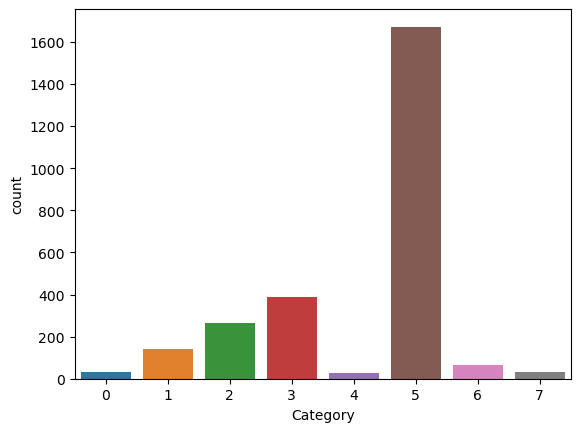

In [22]:
sns.countplot(df,x='Category')

In [23]:
df.dtypes

Gender               int64
Ever_Married         int32
Age                  int64
Graduated            int32
Profession           int32
Work_Experience    float64
Spending_Score       int32
Family_Size        float64
Category             int32
dtype: object

<Axes: >

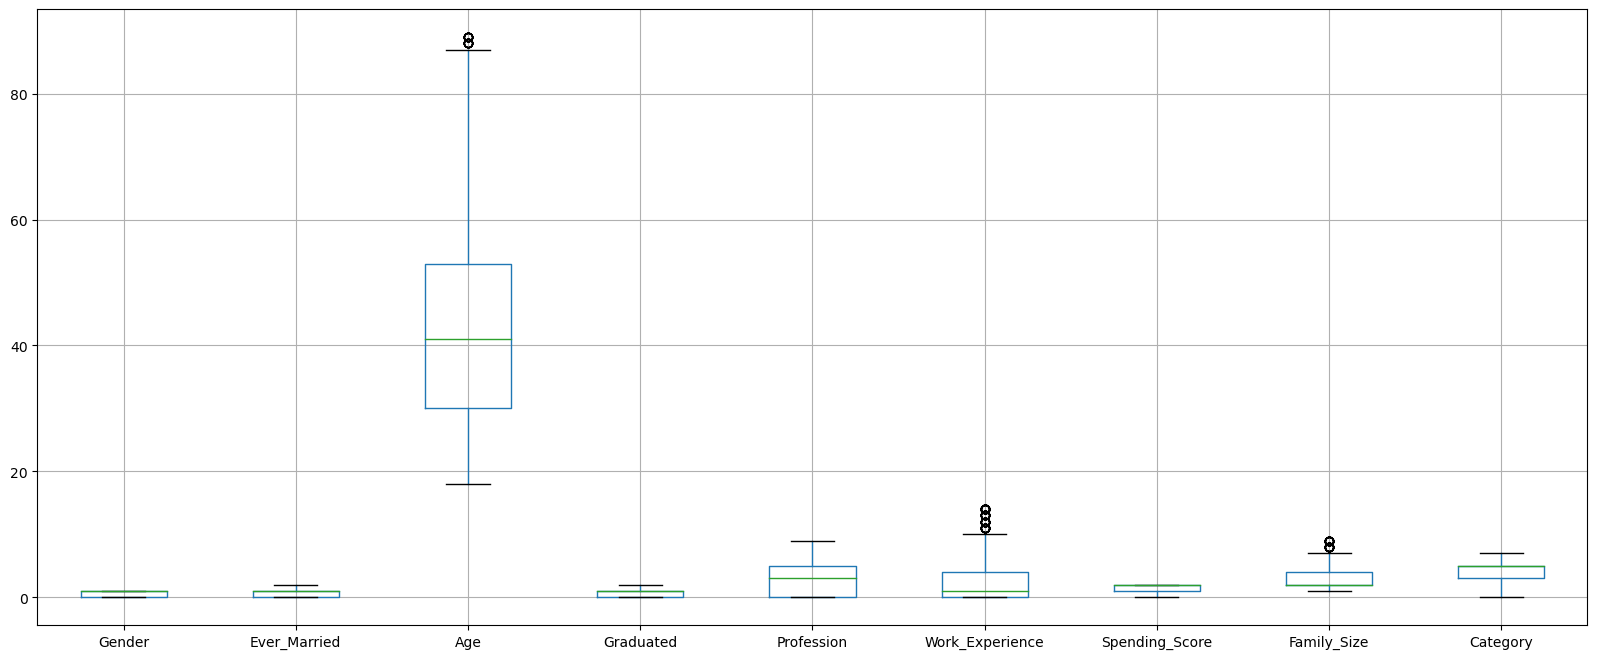

In [24]:
# Box Plot
df.boxplot(figsize = (20,8))

In [26]:
df.corr()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Category
Gender,1.000000,0.085838,0.010165,-0.050855,0.049279,-0.061088,-0.041855,0.069903,0.024349
Ever_Married,0.085838,1.000000,0.530806,0.174450,-0.080415,-0.092812,-0.575839,-0.078458,0.047223
Age,0.010165,0.530806,1.000000,0.230131,0.068957,-0.164730,-0.284426,-0.270262,0.174374
Graduated,-0.050855,0.174450,0.230131,1.000000,-0.296673,0.046529,-0.135350,-0.255218,0.128053
Profession,0.049279,-0.080415,0.068957,-0.296673,1.000000,-0.034277,0.204222,0.088934,-0.034859
Work_Experience,-0.061088,-0.092812,-0.164730,0.046529,-0.034277,1.000000,0.063882,-0.065119,0.028206
Spending_Score,-0.041855,-0.575839,-0.284426,-0.135350,0.204222,0.063882,1.000000,-0.097660,-0.015026
Family_Size,0.069903,-0.078458,-0.270262,-0.255218,0.088934,-0.065119,-0.097660,1.000000,-0.172042
Category,0.024349,0.047223,0.174374,0.128053,-0.034859,0.028206,-0.015026,-0.172042,1.000000


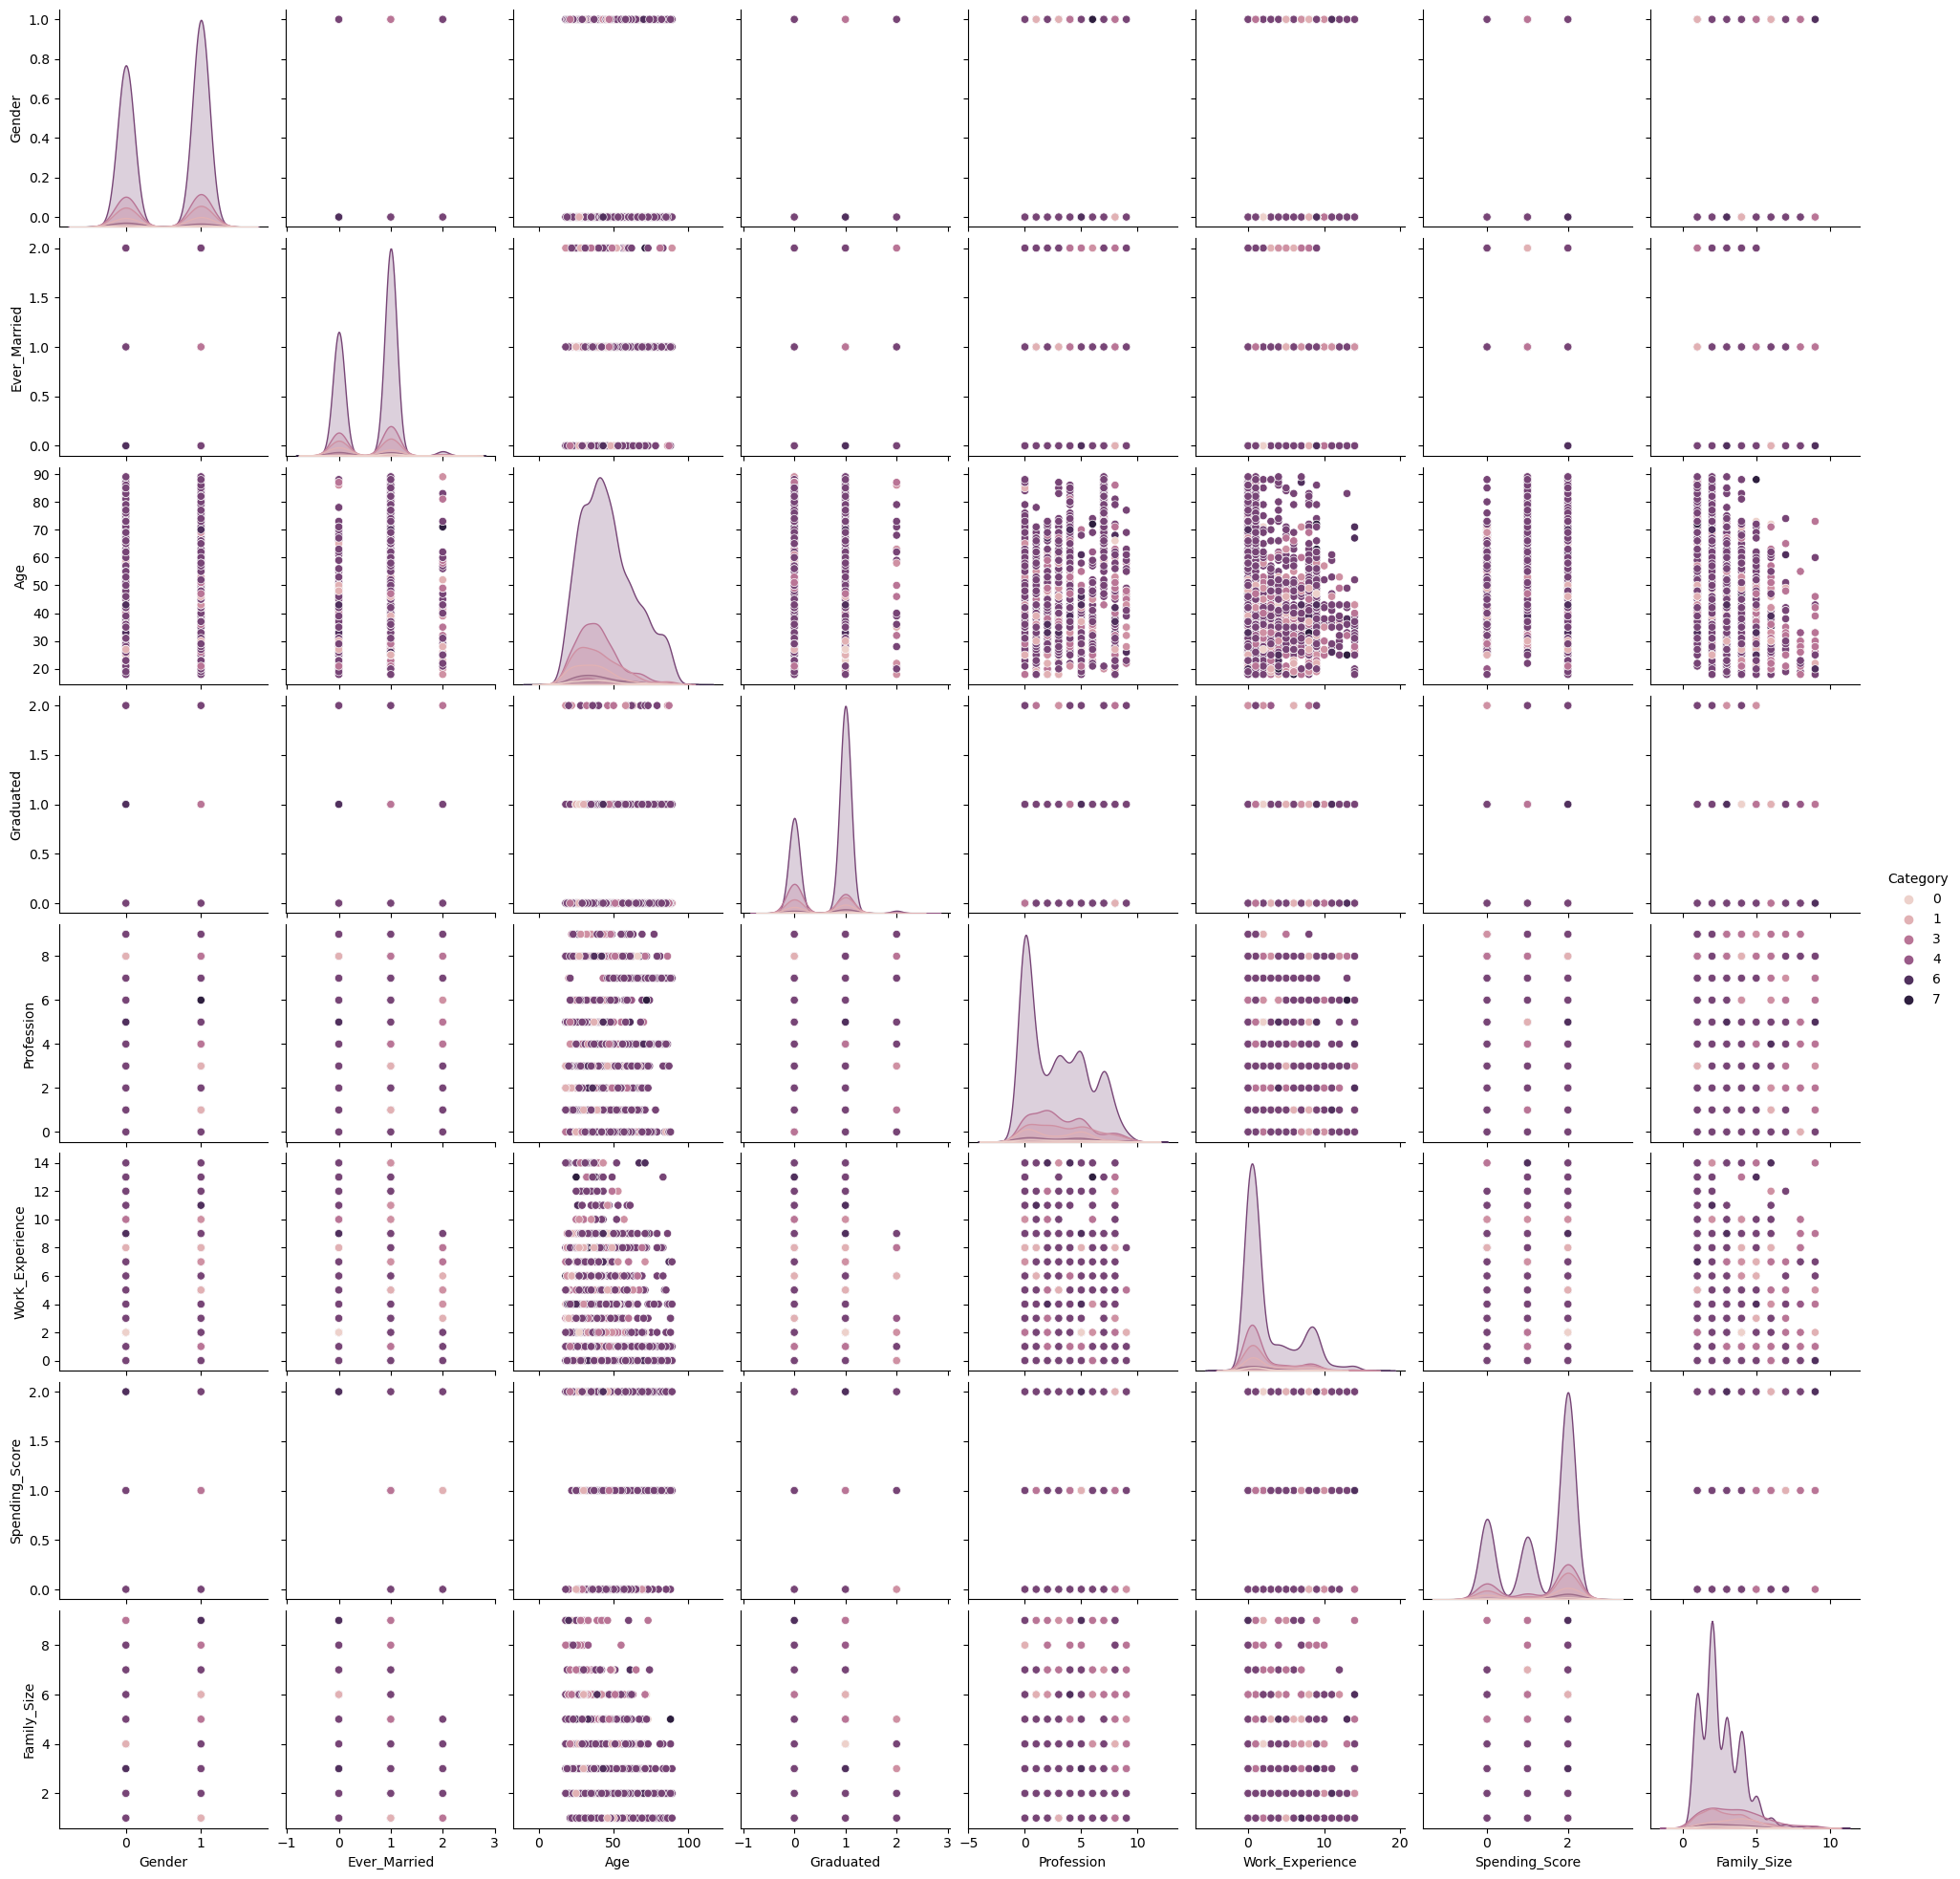

In [28]:
sns.pairplot(df,hue = 'Category')

<Axes: >

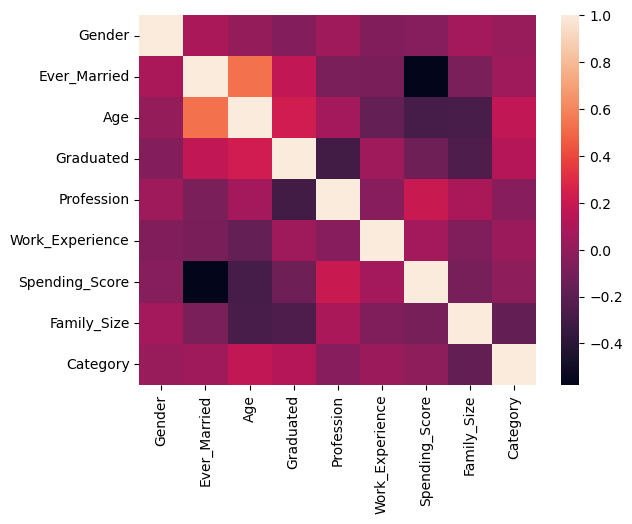

In [29]:
sns.heatmap(df.corr())

# Assign X and Y

In [30]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:].values

In [32]:
x.shape, y.shape

((2627, 8), (2627, 1))

In [33]:
x.head(2)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0,1,36,1,2,0.0,2,1.0
1,1,1,37,1,5,8.0,0,4.0


In [34]:
y

array([[5],
       [5],
       [5],
       ...,
       [5],
       [3],
       [6]])

# Spliting data in Testing and Training

In [35]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .2,random_state = 2)

In [38]:
xtrain.shape,xtest.shape

((2101, 8), (526, 8))

In [39]:
ytrain.shape,xtest.shape

((2101, 1), (526, 8))

# KNN Model

In [45]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
print('*'*27 + 'KNN Classifier Model' + '*'*27)
print()
print('Training phasis\n')
knn_model.fit(xtrain,ytrain)
print('Training completed\n')
print('='*75)
print('Testing phase\n')
print()
ypred = knn_model.predict(xtest)
print('Predicted values are :\t\n',ypred)
print('Testing Completed')
print('='*75)

***************************KNN Classifier Model***************************

Training phasis

Training completed

Testing phase


Predicted values are :	
 [5 5 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 2 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5
 5 5 5 5 5 2 1 1 5 5 5 5 5 1 5 5 5 5 5 2 5 5 5 5 5 3 5 5 2 5 5 5 1 5 5 5 5
 5 5 5 5 5 5 3 5 5 1 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5
 5 5 2 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5
 3 5 5 5 5 5 3 5 5 3 1 5 5 2 5 1 5 2 2 5 3 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 1
 5 5 5 5 5 5 5 5 0 5 0 5 3 5 5 5 1 5 5 5 5 5 5 5 5 3 5 5 5 3 5 2 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 3 5 5 5 5 5 5 5 1 5 5 5 5 5 5 3 5 5 5 5 5 3
 5 2 5 5 1 5 5 3 3 5 5 2 3 5 5 5 3 5 5 5 1 5 5 5 5 5 3 5 5 5 5 3 5 5 2 5 5
 5 5 5 5 5 5 5 1 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 1 5 5 5 3 2
 5 3 5 5 5 5 5 3 5 5 1 5 5 5 5 2 5 5 5 5 5 5 3 5 5 5 5 5 3 5 3 4 5 5 5 5 5
 5 5 5 3 5 5 5 5 2 5 5 5 5 5 5 5 5 5 3 3 5 5 5 2 5 5 3 5 5 5 5 5 2 5 5 5 5
 5 5 5 5 2 5 3 5 2 5 

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


# Peformance Measure for KNN model

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('*'*21 + 'Performance Measures on KNN Model' + '*'*21)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred))
print()
print('='*75)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred))
print()
print('='*75)

*********************Performance Measures on KNN Model*********************
Accuracy score:	
 0.5779467680608364


Confusion matrix:	
 [[  0   0   0   0   0   2   0   0]
 [  1   2   1   2   0  23   0   0]
 [  0   0   4  10   0  48   0   0]
 [  0   3   6  12   0  58   1   0]
 [  0   0   1   0   0   4   0   0]
 [  1  13  17  15   1 286   0   0]
 [  0   0   1   1   0   9   0   0]
 [  0   0   0   0   0   4   0   0]]


Classification report is:	
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.11      0.07      0.09        29
           2       0.13      0.06      0.09        62
           3       0.30      0.15      0.20        80
           4       0.00      0.00      0.00         5
           5       0.66      0.86      0.75       333
           6       0.00      0.00      0.00        11
           7       0.00      0.00      0.00         4

    accuracy                           0.58       526
   macro avg

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Standard Scaling KNN model and its Performance

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_xtrain = sc.fit_transform(xtrain)
sc_xtest = sc.transform(xtest)
sc_xtrain.shape,sc_xtest.shape

((2101, 8), (526, 8))

In [71]:
knn_model = KNeighborsClassifier(n_neighbors=3)
print('*'*27 + 'KNN Classifier Model' + '*'*28)
print()
print('Training phasis\n')
knn_model.fit(sc_xtrain,ytrain)
print('Training completed\n')
print('='*75)
print('Testing phase\n')
print()
sc_ypred = knn_model.predict(sc_xtest)
print('Predicted values are :\t\n',sc_ypred)
print('Testing Completed')
print('='*75)
print()
print('*'*13 + 'Performance Measures on Standard Scaler KNN Model' + '*'*13)
print('Accuracy score:\t\n',accuracy_score(ytest,sc_ypred))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,sc_ypred))
print()
print('='*75)
print()
print('Classification report is:\t\n',classification_report(ytest,sc_ypred))
print()
print('='*75)

***************************KNN Classifier Model****************************

Training phasis

Training completed

Testing phase


Predicted values are :	
 [2 3 5 0 1 5 5 1 5 5 5 5 5 5 5 5 5 3 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2
 5 5 1 5 5 5 1 1 1 5 2 5 5 5 5 5 3 5 5 2 1 5 3 5 5 3 5 3 2 3 5 5 2 1 5 5 0
 5 5 5 5 5 5 2 5 0 5 0 5 5 5 5 2 5 5 5 1 5 5 5 5 3 5 0 5 5 5 0 5 5 5 5 3 5
 5 5 5 5 5 5 5 5 5 5 5 3 5 5 2 1 2 5 5 5 5 5 5 5 0 5 5 0 5 2 5 5 5 5 7 5 5
 2 5 2 2 2 5 0 5 5 3 3 5 5 5 5 5 5 2 3 2 3 5 5 5 5 3 2 1 2 5 5 5 5 3 5 3 1
 5 5 5 5 5 5 5 5 3 5 0 5 5 5 5 5 5 5 5 5 5 1 5 1 5 5 3 5 5 3 2 2 5 5 1 5 5
 3 3 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 0 5 5 2 5 5 1 5 5 5 5 3 5 5 5 2
 5 5 2 5 1 1 5 5 0 5 3 5 5 5 3 5 3 1 2 5 5 5 5 5 5 3 5 3 1 1 5 5 5 1 5 5 5
 5 5 3 2 5 1 5 3 3 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 3 5 5 3 5 1 3 5 5 5 5
 5 3 5 3 5 5 5 2 3 5 2 2 1 5 5 5 2 5 5 5 5 5 5 0 2 2 5 5 5 5 5 5 5 5 2 5 5
 5 5 3 0 5 3 5 2 3 5 5 5 5 5 1 5 5 5 3 5 2 1 5 3 5 5 5 3 5 5 5 5 2 3 1 2 5
 5 5 5 5 5 1 3 5 5 5

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classific

# MinMax Scaling KNN model and its Performance

In [62]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm_xtrain = mm.fit_transform(xtrain)
mm_xtest = mm.transform(xtest)
xtrain.shape,xtest.shape

((2101, 8), (526, 8))

In [66]:
knn_model = KNeighborsClassifier(n_neighbors=3)
print('*'*27 + 'KNN Classifier Model' + '*'*28)
print()
print('Training phasis\n')
knn_model.fit(mm_xtrain,ytrain)
print('Training completed\n')
print('='*75)
print('Testing phase\n')
print()
mm_ypred = knn_model.predict(mm_xtest)
print('Predicted values are :\t\n',mm_ypred)
print('Testing Completed')
print('='*75)
print()
print('*'*14 + 'Performance Measures on MinMax Scaler KNN Model' + '*'*14)
print('Accuracy score:\t\n',accuracy_score(ytest,mm_ypred))
print()
print('='*75)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,mm_ypred))
print()
print('='*80)
print()
print('Classification report is:\t\n',classification_report(ytest,mm_ypred))
print()
print('='*80)

***************************KNN Classifier Model****************************

Training phasis

Training completed

Testing phase


Predicted values are :	
 [2 3 5 5 2 5 5 1 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 1 2
 5 5 1 5 5 5 1 1 5 5 2 5 5 5 5 5 3 5 5 5 1 5 5 5 5 3 0 3 1 5 5 5 2 1 5 5 0
 5 5 5 5 5 5 2 5 0 5 5 2 5 5 5 2 5 5 5 1 5 5 5 5 3 5 0 5 5 5 0 5 5 5 5 2 5
 5 5 5 1 5 5 5 5 5 5 5 3 5 5 5 1 2 5 5 5 5 1 5 5 0 5 5 5 5 2 5 5 5 5 7 5 5
 2 5 1 2 2 5 0 5 5 3 3 5 5 5 5 5 5 2 5 2 3 5 2 5 5 5 2 1 2 5 5 5 5 3 5 5 5
 5 5 5 5 5 5 5 5 3 5 0 5 5 5 5 5 6 5 1 5 5 1 5 1 5 5 3 5 5 3 2 2 1 5 1 5 5
 3 3 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5 5 3 5 5 2 5 5 1 5 5 3 5 3 5 5 5 1
 5 3 2 2 3 1 5 5 0 5 3 5 5 5 3 5 3 3 2 3 5 5 5 5 5 3 5 5 1 1 5 5 5 1 5 5 5
 5 5 3 2 5 5 5 2 3 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 3 5 5 3 5 1 3 5 5 5 5
 5 5 5 3 5 5 5 2 3 5 2 2 1 5 5 5 2 5 5 5 5 5 5 0 2 2 5 5 5 5 5 5 5 5 2 5 5
 5 5 3 2 5 3 5 2 3 5 5 5 5 5 1 5 5 5 3 5 2 1 5 3 5 5 5 3 5 5 6 5 2 3 1 2 5
 5 5 5 5 5 1 3 5 5 5

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classific

# HyperParameter Tuning K = [5,7,9,11]

1. KNN model with K = 5 and Performance measure for Same

In [72]:
knn_model = KNeighborsClassifier(n_neighbors=5)
print('*'*28 + 'KNN Classifier Model' + '*'*28)
print()
print('Training phasis\n')
knn_model.fit(xtrain,ytrain)
print('Training completed\n')
print('='*77)
print('Testing phase\n')
print()
ypred = knn_model.predict(xtest)
print('Predicted values are :\t\n',ypred)
print('Testing Completed')
print('='*77)
print()
print('*'*21 + 'Performance Measures on KNN Model' + '*'*21)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*77)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred))
print()
print('='*77)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred))
print()
print('='*77)

****************************KNN Classifier Model****************************

Training phasis

Training completed

Testing phase


Predicted values are :	
 [5 5 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 2 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5
 5 5 5 5 5 2 1 1 5 5 5 5 5 1 5 5 5 5 5 2 5 5 5 5 5 3 5 5 2 5 5 5 1 5 5 5 5
 5 5 5 5 5 5 3 5 5 1 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5
 5 5 2 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5
 3 5 5 5 5 5 3 5 5 3 1 5 5 2 5 1 5 2 2 5 3 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 1
 5 5 5 5 5 5 5 5 0 5 0 5 3 5 5 5 1 5 5 5 5 5 5 5 5 3 5 5 5 3 5 2 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 3 5 5 5 5 5 5 5 1 5 5 5 5 5 5 3 5 5 5 5 5 3
 5 2 5 5 1 5 5 3 3 5 5 2 3 5 5 5 3 5 5 5 1 5 5 5 5 5 3 5 5 5 5 3 5 5 2 5 5
 5 5 5 5 5 5 5 1 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 1 5 5 5 3 2
 5 3 5 5 5 5 5 3 5 5 1 5 5 5 5 2 5 5 5 5 5 5 3 5 5 5 5 5 3 5 3 4 5 5 5 5 5
 5 5 5 3 5 5 5 5 2 5 5 5 5 5 5 5 5 5 3 3 5 5 5 2 5 5 3 5 5 5 5 5 2 5 5 5 5
 5 5 5 5 2 5 3 5 2 

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classific

2. KNN model with K = 7 and Performance measure for Same

In [73]:
knn_model = KNeighborsClassifier(n_neighbors=7)
print('*'*28 + 'KNN Classifier Model' + '*'*28)
print()
print('Training phasis\n')
knn_model.fit(xtrain,ytrain)
print('Training completed\n')
print('='*77)
print('Testing phase\n')
print()
ypred = knn_model.predict(xtest)
print('Predicted values are :\t\n',ypred)
print('Testing Completed')
print('='*77)
print()
print('*'*21 + 'Performance Measures on KNN Model' + '*'*21)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*77)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred))
print()
print('='*77)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred))
print()
print('='*77)

****************************KNN Classifier Model****************************

Training phasis

Training completed

Testing phase


Predicted values are :	
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5
 5 5 5 5 5 5 2 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 2 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5
 5 5 5 5 5 5 5 5 5 5 5 3 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 3 5 5 5 5 5 5 5 5 3 1 5 5 2 5 5 5 5 2 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 2 5 3 5 5 5 5 5 5 5 5 5 5 2
 5 3 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5
 5 5 5 5 2 5 3 3 3 5 5 5 5 5 5 5 3 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 3 5 5 5 5 5 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5
 5 3 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 1 5 5 2 5 3 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 3 5 5 5 5 5 1 5 5 5 5
 5 5 3 5 5 5 3 5 5 

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classific

3. KNN model with K = 9 and Performance measure for Same

In [74]:
knn_model = KNeighborsClassifier(n_neighbors=9)
print('*'*28 + 'KNN Classifier Model' + '*'*28)
print()
print('Training phasis\n')
knn_model.fit(xtrain,ytrain)
print('Training completed\n')
print('='*77)
print('Testing phase\n')
print()
ypred = knn_model.predict(xtest)
print('Predicted values are :\t\n',ypred)
print('Testing Completed')
print('='*77)
print()
print('*'*21 + 'Performance Measures on KNN Model' + '*'*21)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*77)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred))
print()
print('='*77)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred))
print()
print('='*77)

****************************KNN Classifier Model****************************

Training phasis

Training completed

Testing phase


Predicted values are :	
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5
 5 5 5 5 5 5 2 1 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 3 3 5 5 2 5 5 5 5 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5
 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 3 5 5 5 5 5 5
 5 5 5 5 2 5 5 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5
 5 3 5 5 5 5 5 2 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5 5 3 5 3 5 5 5 5 5 5 5 5 5 5 5 5 1 5 5 5 5
 5 5 5 5 5 5 3 5 5 

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classific

4. KNN model with K = 11 and Performance measure for Same

In [75]:
knn_model = KNeighborsClassifier(n_neighbors=11)
print('*'*28 + 'KNN Classifier Model' + '*'*28)
print()
print('Training phasis\n')
knn_model.fit(xtrain,ytrain)
print('Training completed\n')
print('='*77)
print('Testing phase\n')
print()
ypred = knn_model.predict(xtest)
print('Predicted values are :\t\n',ypred)
print('Testing Completed')
print('='*77)
print()
print('*'*21 + 'Performance Measures on KNN Model' + '*'*21)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*77)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred))
print()
print('='*77)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred))
print()
print('='*77)

****************************KNN Classifier Model****************************

Training phasis

Training completed

Testing phase


Predicted values are :	
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 3 5 5 5 2 5 5 5 5 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5
 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 2 5 5 5 5 5 3 5 5 5 5 5 5
 5 3 5 5 2 5 5 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5
 5 3 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 2 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 3 5 5 

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classific

5. KNN model with K = 21 and Performance measure for Same

In [76]:
knn_model = KNeighborsClassifier(n_neighbors=21)
print('*'*28 + 'KNN Classifier Model' + '*'*28)
print()
print('Training phasis\n')
knn_model.fit(xtrain,ytrain)
print('Training completed\n')
print('='*77)
print('Testing phase\n')
print()
ypred = knn_model.predict(xtest)
print('Predicted values are :\t\n',ypred)
print('Testing Completed')
print('='*77)
print()
print('*'*21 + 'Performance Measures on KNN Model' + '*'*21)
print('Accuracy score:\t\n',accuracy_score(ytest,ypred))
print()
print('='*77)
print()
print('Confusion matrix:\t\n',confusion_matrix(ytest,ypred))
print()
print('='*77)
print()
print('Classification report is:\t\n',classification_report(ytest,ypred))
print()
print('='*77)

****************************KNN Classifier Model****************************

Training phasis

Training completed

Testing phase


Predicted values are :	
 [5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 2 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3 5 5 5 5 5 5
 5 5 5 5 5 5 5 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 3
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 3 5 5 

C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\manthan mankar\anaconda3\Lib\site-packages\sklearn\metrics\_classific